In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

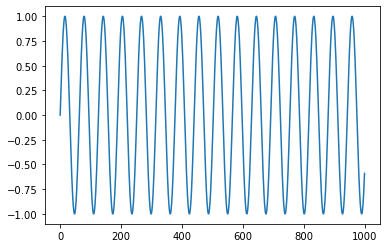

In [2]:
# make the original data
series = np.sin(0.1*np.arange(1000)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [6]:
# Build the dataset
# we will use T values to predict the next
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [12]:
X = np.array(X).reshape(-1, T, 1) # N x T x D
Y = np.array(Y)
N = len(X)
print("X shape: {}   Y shape: {}".format(X.shape, Y.shape))

X shape: (990, 10, 1)   Y shape: (990,)


In [14]:
### Fit RNN model using Functional API
i = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.001)
)

In [19]:
# Train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
16/16 [==============================] - 1s 32ms/step - loss: 0.2318 - val_loss: 0.1575
Epoch 2/80
16/16 [==============================] - 0s 8ms/step - loss: 0.1102 - val_loss: 0.0645
Epoch 3/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.0253
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.0147
Epoch 5/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 6/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0064
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 8/80
16/16 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 9/80
16/16 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 10/80
16/16 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/80
16/16

16/16 [==============================] - 0s 11ms/step - loss: 2.2786e-06 - val_loss: 2.5097e-06
Epoch 79/80
16/16 [==============================] - 0s 8ms/step - loss: 2.4754e-06 - val_loss: 2.3407e-06
Epoch 80/80
16/16 [==============================] - 0s 7ms/step - loss: 2.3729e-06 - val_loss: 2.4907e-06


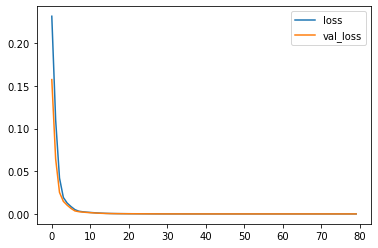

In [20]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [29]:
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, 10, 1))[0,0]
    i += 1
    
    # update the prediction list
    validation_predictions.append(p)

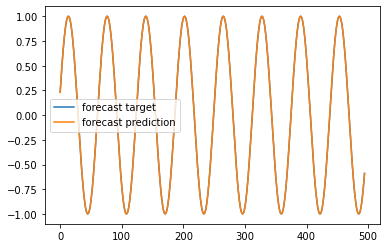

In [32]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [44]:
# forecast future values based of prev predictions
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, 10, 1))[0,0]
    
    # update the prediction list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

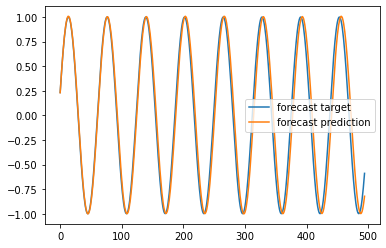

In [45]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()